# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [16]:
import pandas as pd
import numpy as np
import re

%matplotlib inline

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [17]:
df = pd.read_csv("licfile.csv")
df.head()

,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [18]:
colnames=['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1','BIZLINE2','BIZCITYSTATE',
'BIZTELEPHONE','EXPIRATION','OWNER','MAILLINE1','MAILLINE2','MAILCITYSTATE','MAILCOUNTYCODE',
'MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG'] 
df = pd.read_csv("licfile.csv", names=colnames, header=None)
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [19]:
df = pd.read_csv("licfile.csv", names=colnames, header=None, dtype={"EXPIRATION": str, "MAILCOUNTYCODE": str})
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,02252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [20]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [21]:
df.EXPIRATION.dtype

dtype('O')

In [22]:
# Convert to dates
# I don't trust pd.to_datetime, so I want to specify format
# How to specify: http://strftime.org

#pd.to_datetime(df.date, format="12-Feb-18")
df['EXPIRATION'] = pd.to_datetime(df.EXPIRATION, format="%m%d%Y")

Check the first five expirations to make sure they look right.

In [23]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [24]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [25]:
df.LICTYPE.value_counts(ascending=True).head(10)

Legal Service Contract Admin                       1
Licensed Court Interpreter CE Provider             2
Cosmetology Wig Instructor                         2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Mobile Cosmetology Manicure Specialty Saloon       2
Booting CE Provider                                3
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Mobile Cosmetology Esthetician Specialty Saloon    5
Elevator Responsible Party CE Provider             8
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [26]:
# Yes I know I left this in here, it's a learning experience!

df[df['LICTYPE'].str.contains("Electrician")]

ValueError: cannot index with vector containing NA / NaN values

## 8. How many of the rows of LICTYPE are NaN?

In [32]:
df.LICTYPE.isnull().value_counts()

False    590730
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [33]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017-05-27,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2017-10-21,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017-05-28,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016-06-18,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2016-10-26,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
47030,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,2016-10-21,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,0201,HARRIS,77087,8325285241,AE,N
47031,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,2017-12-14,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,0453,TRAVIS,78753,7372474738,AE,N
47032,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,2017-06-03,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,0067,CASS,75656,9036392017,AE,N
47033,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,2017-06-11,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,0201,HARRIS,77021,7134406945,AE,N
47034,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,2017-11-17,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,0167,GALVESTON,77568,4095390843,AE,N


## 10. What's the most popular kind of electrician?

In [34]:
electrician = df[df['LICTYPE'].str.contains("Electrician").fillna(False)]
electrician.LICTYPE.value_counts()

Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

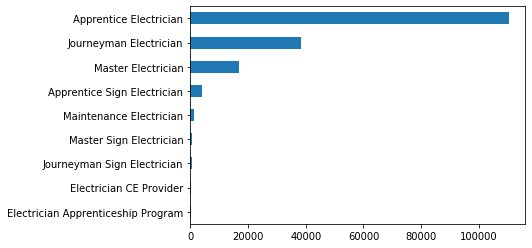

In [35]:
electrician.LICTYPE.value_counts(ascending=True).plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [36]:
electrician['LICTYPE'].str.contains("Sign").sum()

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [37]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


In [38]:
df.OWNER.str.extract("(.*),", expand=False).head()

0    RISINGER
1    WILLIAMS
2     GUEVARA
3      BOWERS
4      DEMSKY
Name: OWNER, dtype: object

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [39]:
df['LASTNAME'] = df.OWNER.str.extract("(.*),", expand=False)

In [40]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [41]:
df.LASTNAME.value_counts().head(10)

NGUYEN       22283
TRAN          8135
LE            5605
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4625
HERNANDEZ     4389
PHAM          3996
GONZALEZ      3634
SMITH         3208
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [42]:
df[df.LASTNAME == 'NGUYEN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     12855
Cosmetology Operator        4039
Cosmetology Esthetician     2881
Cosmetologist               1874
Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [43]:
df[df.LASTNAME == 'TRAN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     4674
Cosmetology Operator       1474
Cosmetology Esthetician    1032
Cosmetologist               712
Apprentice Electrician       95
Name: LICTYPE, dtype: int64

In [44]:
df[df.LASTNAME == 'LE'].LICTYPE.value_counts().head()

Cosmetology Manicurist     3276
Cosmetology Operator        953
Cosmetology Esthetician     730
Cosmetologist               497
A/C Technician               43
Name: LICTYPE, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [45]:
df[df.LASTNAME.isin(['NGUYEN','TRAN','LE'])].LICTYPE.value_counts().head()

Cosmetology Manicurist     20805
Cosmetology Operator        6466
Cosmetology Esthetician     4643
Cosmetologist               3083
Apprentice Electrician       327
Name: LICTYPE, dtype: int64

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [46]:
df[df.LASTNAME == 'GARCIA'].LICTYPE.value_counts().head()

Apprentice Electrician    1952
Cosmetology Operator      1672
Journeyman Electrician     493
A/C Technician             333
Barber, Class A            186
Name: LICTYPE, dtype: int64

In [47]:
df[df.LASTNAME == 'RODRIGUEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1573
Cosmetology Operator      1390
Journeyman Electrician     386
A/C Technician             320
Barber, Class A            138
Name: LICTYPE, dtype: int64

In [48]:
df[df.LASTNAME == 'HERNANDEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1659
Cosmetology Operator      1324
Journeyman Electrician     333
A/C Technician             288
Barber, Class A            110
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [49]:
pattern = r'\w*EZ\b'
EZ = df[df['LASTNAME'].str.contains(pattern).fillna(False)]
EZ.LICTYPE.value_counts().head()

Apprentice Electrician    17248
Cosmetology Operator      14749
Journeyman Electrician     3550
A/C Technician             3030
Barber, Class A            1331
Name: LICTYPE, dtype: int64

In [50]:
EZ.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME
27,Associate Auctioneer,17695,EL PASO,"MARTINEZ, BRANDY MARIE",NaN,NaN,NaN,NaN,2017-04-11,"MARTINEZ, BRANDY MARIE",7120 ALTO REY AVE,NaN,EL PASO TX 79912-2104,0141,EL PASO,79912,9153733887,NaN,N,MARTINEZ
29,Associate Auctioneer,17699,EL PASO,"MARTINEZ, ARTURO",NaN,NaN,NaN,NaN,2017-04-18,"MARTINEZ, ARTURO",7120 ALTO REY AVE,NaN,EL PASO TX 79912-2104,0141,EL PASO,79912,9153733887,NaN,N,MARTINEZ
89,A/C Technician,196,DALLAS,"SANCHEZ, JUAN CARLOS",NaN,NaN,NaN,NaN,2017-07-20,"SANCHEZ, JUAN CARLOS",NaN,NaN,NaN,NaN,DALLAS,75287,NaN,REG,N,SANCHEZ
91,A/C Technician,205,HARRIS,"HERNANDEZ, DAVID R",NaN,NaN,NaN,NaN,2017-04-20,"HERNANDEZ, DAVID R",NaN,NaN,NaN,NaN,HARRIS,77373,NaN,CER,N,HERNANDEZ
134,A/C Technician,343,CALHOUN,"RODRIGUEZ, MARIO H",NaN,NaN,NaN,NaN,2017-05-07,"RODRIGUEZ, MARIO H",NaN,NaN,NaN,NaN,CALHOUN,77983,NaN,REG,N,RODRIGUEZ


## 20. Get that as a percentage

In [51]:
EZ.LICTYPE.value_counts(normalize=True).head() * 100

Apprentice Electrician    36.750261
Cosmetology Operator      31.425649
Journeyman Electrician     7.563974
A/C Technician             6.456012
Barber, Class A            2.835958
Name: LICTYPE, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [52]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [53]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [54]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [55]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [56]:
df.OWNER.str.extract(", (.*) ", expand=False).head(10)

0              JIM
1              JON
2             JUAN
3    JAMES BRISCOE
4             JOHN
5            RANDY
6            MONTE
7           THOMAS
8            KERRY
9         NICHOLAS
Name: OWNER, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [102]:
df['FIRSTNAME'] = df.OWNER.str.extract(", (.*) ", expand=False)

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [103]:
df['FIRSTNAME'].isnull().value_counts()

False    385511
True     212305
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [104]:
df[df.FIRSTNAME.isnull()].OWNER.head()

29      MARTINEZ, ARTURO
63    VANGINAULT, FREDDY
64    VANSICKLE, MICHAEL
73        COFFMAN, ERICK
76         HUNTER, SCOTT
Name: OWNER, dtype: object

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [112]:
#pattern = r',(| )(\w*)\b' #accounts for "L, F" "L,F" and "L, F M"
#df['FIRSTNAME'] = df.OWNER.str.extract(r',(| )(\w*)\b', expand=False) #extract won't work with regex for me

df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df.OWNER.str.extract(", (.*)", expand=False)

How many empty first names do we have now?

In [113]:
df['FIRSTNAME'].isnull().value_counts()

False    515717
True      82099
Name: FIRSTNAME, dtype: int64

In [114]:
df[df.FIRSTNAME.isnull()].OWNER.head()

1501                                PERRY,MARK E
5826                     MEJIA ,LUIS GILBERTO JR
28022    APPLIANCE INSTALLATION BY SPECIAL D LLC
28023                   CAPITAL DISTRIBUTING INC
28024                              INSTALLCO LLC
Name: OWNER, dtype: object

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [117]:
df.FIRSTNAME.value_counts().head()

JOSE       6462
MICHAEL    5447
DAVID      4960
MARIA      4647
JAMES      4217
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [126]:
#ALL containing 'Cosmet...'
df[df.LICTYPE.str.contains('Cosmet').fillna(False)].FIRSTNAME.value_counts().head()

MARIA       4169
JENNIFER    1884
JESSICA     1619
PHUONG      1429
THUY        1394
Name: FIRSTNAME, dtype: int64

In [118]:
df[df.LICTYPE == 'Cosmetology Operator'].FIRSTNAME.value_counts().head()

MARIA       3776
JENNIFER    1384
JESSICA     1327
ASHLEY      1102
MARY        1038
Name: FIRSTNAME, dtype: int64

In [119]:
df[df.LICTYPE == 'Cosmetology Esthetician'].FIRSTNAME.value_counts().head()

JENNIFER    247
THUY        228
PHUONG      213
JESSICA     171
ASHLEY      155
Name: FIRSTNAME, dtype: int64

In [120]:
df[df.LICTYPE == 'Cosmetologist'].FIRSTNAME.value_counts().head()

THUY      158
PHUONG    148
KIM        99
TRANG      88
MAI        78
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [129]:
df[df.LICTYPE.str.contains('Electric').fillna(False)].FIRSTNAME.value_counts().head()

JOSE       4676
MICHAEL    3264
DAVID      3053
JUAN       2739
JAMES      2513
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [130]:
!pip install gender-guesser

     |████████████████████████████████| 389kB 514kB/s eta 0:00:01


#### Test to see that it works

In [131]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [132]:
detector.get_gender('Jose')

'male'

In [133]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [134]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0       male
1       male
2       male
3    unknown
4       male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [137]:
df['GENDER'] = df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name))

In [139]:
df.GENDER.value_counts()

male             208826
unknown          169859
female           145492
mostly_female     33024
mostly_male       24038
andy              16577
Name: GENDER, dtype: int64

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [141]:
import numpy as np

df['GENDER'] = df['GENDER'].replace({
    'mostly_male': 'male',
    'mostly_female': 'female'
})

df['GENDER'] = df.GENDER.replace(["andy", "unknown"], np.nan)

In [148]:
#df.GENDER.value_counts()

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [143]:
df.GENDER.value_counts()

male      232864
female    178516
Name: GENDER, dtype: int64

In [147]:
df.GENDER.isnull().value_counts(normalize=True)*100

False    68.813816
True     31.186184
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [153]:
df[df.GENDER.isnull()].FIRSTNAME.value_counts().head(10)

THANH    985
DUNG     807
TRANG    771
INC      715
LINH     667
HONG     625
LAN      611
LLC      608
HUNG     473
YEN      456
Name: FIRSTNAME, dtype: int64

## 31. What are the most popular licenses for men? For women?

In [157]:
df[df.GENDER == "male"].LICTYPE.value_counts().head(10)

Apprentice Electrician                      86648
Journeyman Electrician                      32258
A/C Technician                              22538
Master Electrician                          14302
Cosmetology Operator                        12945
Cosmetology Manicurist                       9528
Barber, Class A                              9236
Tow Truck Operator (Incident Management)     6169
Tow Truck Operator (Consent Tow)             5234
Legal Service Contract Sales Rep             5110
Name: LICTYPE, dtype: int64

In [158]:
df[df.GENDER == "female"].LICTYPE.value_counts().head(10)

Cosmetology Operator                111573
Cosmetology Manicurist               19199
Cosmetology Esthetician              15562
Apprentice Electrician                4625
Legal Service Contract Sales Rep      4397
Cosmetology Operator Instructor       4326
Barber, Class A                       4036
Cosmetologist                         3570
VSF Employee                          1751
Property Tax Appraiser                1172
Name: LICTYPE, dtype: int64

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [160]:
df[df.LICTYPE == "Property Tax Appraiser"].GENDER.value_counts()

male      1389
female    1172
Name: GENDER, dtype: int64

In [161]:
df[df.LICTYPE.str.contains('Tow').fillna(False)].GENDER.value_counts()

male      15177
female      915
Name: GENDER, dtype: int64

(By the way, what are those tow truck jobs?)

In [164]:
df[df.LICTYPE.str.contains('Tow').fillna(False)].LICTYPE.value_counts()

Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Consent Tow)            6703
Dual Towing Operator(IM)/VSF Employee       4173
Tow Truck Operator (Private Property)        352
Dual Towing Operator(CT)/VSF Employee        188
Dual Towing Operator(PP)/VSF Employee         68
Tow Truck Operator Trainee                    53
Tow Operator CE Provider                      21
Name: LICTYPE, dtype: int64

## 33. Graph them!

And let's **give them titles** so we know which is which.

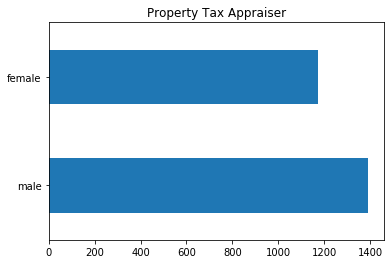

In [168]:
df[df.LICTYPE == "Property Tax Appraiser"].GENDER.value_counts().plot(kind='barh', title='Property Tax Appraiser')

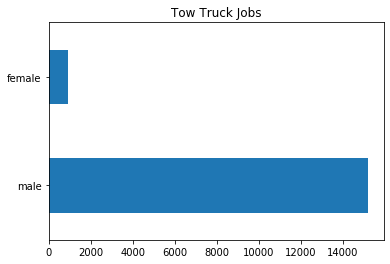

In [170]:
df[df.LICTYPE.str.contains('Tow').fillna(False)].GENDER.value_counts().plot(kind='barh', title='Tow Truck Jobs')

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [171]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    86648
Journeyman Electrician    32258
A/C Technician            22538
Master Electrician        14302
Cosmetology Operator      12945
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [188]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,LICTYPE,LICTYPE,LICTYPE
A/C CE Provider,NaN,NaN,56.0
A/C Contractor,NaN,NaN,16376.0
A/C Technician,22538.0,841.0,4580.0
Appliance Installation Contractor,NaN,NaN,668.0
Appliance Installer,1636.0,61.0,263.0


In [189]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,A/C CE Provider,NaN,NaN,56.0
1,A/C Contractor,NaN,NaN,16376.0
2,A/C Technician,22538.0,841.0,4580.0
3,Appliance Installation Contractor,NaN,NaN,668.0
4,Appliance Installer,1636.0,61.0,263.0


In [190]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,A/C CE Provider,0.0,0.0,56.0
1,A/C Contractor,0.0,0.0,16376.0
2,A/C Technician,22538.0,841.0,4580.0
3,Appliance Installation Contractor,0.0,0.0,668.0
4,Appliance Installer,1636.0,61.0,263.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [192]:
gender_df['total'] = gender_df.male + gender_df.female + gender_df.unknown
gender_df['percent_known'] = (gender_df.male + gender_df.female) / (gender_df.male + gender_df.female + gender_df.unknown) *100
gender_df['percent_male'] = gender_df.male / (gender_df.male + gender_df.female + gender_df.unknown) *100
gender_df['percent_female'] = gender_df.female / (gender_df.male + gender_df.female + gender_df.unknown) *100


In [194]:
gender_df.head()

,license,male,female,unknown,total,percent_known,percent_male,percent_female
0,A/C CE Provider,0.0,0.0,56.0,56.0,0.000000,0.000000,0.000000
1,A/C Contractor,0.0,0.0,16376.0,16376.0,0.000000,0.000000,0.000000
2,A/C Technician,22538.0,841.0,4580.0,27959.0,83.618870,80.610895,3.007976
3,Appliance Installation Contractor,0.0,0.0,668.0,668.0,0.000000,0.000000,0.000000
4,Appliance Installer,1636.0,61.0,263.0,1960.0,86.581633,83.469388,3.112245


## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

In [204]:
gender_df[(gender_df.total > 2000) & (gender_df.percent_known > 75)] \
    .sort_values(by='percent_male', ascending=False) \
    .head(10)

,license,male,female,unknown,total,percent_known,percent_male,percent_female
68,Master Electrician,14302.0,374.0,2134.0,16810.0,87.305175,85.080309,2.224866
60,Journeyman Electrician,32258.0,983.0,4929.0,38170.0,87.086717,84.511396,2.575321
2,A/C Technician,22538.0,841.0,4580.0,27959.0,83.618870,80.610895,3.007976
94,Tow Truck Operator (Incident Management),6169.0,331.0,1304.0,7804.0,83.290620,79.049206,4.241415
52,Dual Towing Operator(IM)/VSF Employee,3294.0,264.0,615.0,4173.0,85.262401,78.936017,6.326384
5,Apprentice Electrician,86648.0,4625.0,19320.0,110593.0,82.530540,78.348539,4.182001
93,Tow Truck Operator (Consent Tow),5234.0,268.0,1201.0,6703.0,82.082650,78.084440,3.998210
6,Apprentice Sign Electrician,3015.0,168.0,811.0,3994.0,79.694542,75.488232,4.206309
8,Auctioneer,1788.0,308.0,284.0,2380.0,88.067227,75.126050,12.941176
98,Used Auto Parts Recycler Employee,1709.0,430.0,370.0,2509.0,85.253089,68.114787,17.138302


In [205]:
gender_df[(gender_df.total > 2000) & (gender_df.percent_known > 75)] \
    .sort_values(by='percent_female', ascending=False) \
    .head(10)

,license,male,female,unknown,total,percent_known,percent_male,percent_female
42,Cosmetology Operator Instructor,524.0,4326.0,895.0,5745.0,84.421236,9.120975,75.300261
41,Cosmetology Operator,12945.0,111573.0,26688.0,151206.0,82.349907,8.561168,73.788739
99,VSF Employee,1280.0,1751.0,459.0,3490.0,86.848138,36.676218,50.171920
79,Property Tax Appraiser,1389.0,1172.0,285.0,2846.0,89.985945,48.805341,41.180604
64,Legal Service Contract Sales Rep,5110.0,4397.0,1929.0,11436.0,83.132214,44.683456,38.448758
21,"Barber, Class A",9236.0,4036.0,2747.0,16019.0,82.851614,57.656533,25.195081
98,Used Auto Parts Recycler Employee,1709.0,430.0,370.0,2509.0,85.253089,68.114787,17.138302
8,Auctioneer,1788.0,308.0,284.0,2380.0,88.067227,75.126050,12.941176
52,Dual Towing Operator(IM)/VSF Employee,3294.0,264.0,615.0,4173.0,85.262401,78.936017,6.326384
94,Tow Truck Operator (Incident Management),6169.0,331.0,1304.0,7804.0,83.290620,79.049206,4.241415


## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.